# Plotting Exercises, Part 2

## Wealth and Democracy

Let's now pivot from working with example data to real data. Load the World Development Indicator data you worked with over the summer. This is country-level data that includes information on both countries' GDP per capita (a measure of wealth) and the Polity IV scores (a measure of how democratic a country is -- countries with higher scores are liberal democracies, countries with low scores are autocratic.). Use the code below to download the data. 

In [636]:
import warnings

warnings.filterwarnings("ignore")

In [637]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

wdi = pd.read_csv(
    "https://raw.githubusercontent.com/nickeubank/"
    "practicaldatascience/master/Example_Data/world-small.csv"
)

Your data should look like this: 

In [638]:
wdi.head()

,country,region,gdppcap08,polityIV
0,Albania,C&E Europe,7715,17.8
1,Algeria,Africa,8033,10.0
2,Angola,Africa,5899,8.0
3,Argentina,S. America,14333,18.0
4,Armenia,C&E Europe,6070,15.0


### Exercise 1

Let's being analyzing this data by estimating a simple linear model ("ordinary least squares") of the relationship between GDP per capita (`gdppcap08`) and democracy scores (`polityIV`). We will do so using the `statsmodel` package, which we'll discuss in detail later is this course. For the momement, just use this code:

```python
import statsmodels.formula.api as smf
results = smf.ols('polityIV ~ gdppcap08',
                   data=wdi).fit()
print(results.summary())
```


In [639]:
import statsmodels.formula.api as smf

results = smf.ols("polityIV ~ gdppcap08", data=wdi).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               polityIV   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     6.981
Date:                Thu, 26 Oct 2023   Prob (F-statistic):            0.00915
Time:                        01:37:04   Log-Likelihood:                -475.14
No. Observations:                 145   AIC:                             954.3
Df Residuals:                     143   BIC:                             960.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1354      0.721     16.841      0.0

### Exercise 2

Based on the results of this analysis, what would you conclude about about the relationship between `gdppcap08` and `polityIV`? 

(If you aren't familiar with Linear Models and aren't sure how to interprete this, you can also just look at the simple correlation between these two variables using `wdi[['polityIV', 'gdppcap08']].corr()`.)

Write down your conclusions. 

In [640]:
wdi[["polityIV", "gdppcap08"]].corr()

,polityIV,gdppcap08
polityIV,1.000000,0.215749
gdppcap08,0.215749,1.000000


> OLS Regression Result Interpretation 
> + In the absence of any GDP per capita (or when it's zero), the model predicts a country's Polity IV score (democracy level) to be 12.1354. 
> + There is a positive correlation between GDP per capita and Polity IV scores. 
> + For every one unit increase in GDP per capita, the Polity IV scores is predicted to increase by approximately 0.00009602 units, holding all else constant. 

> Correlation Interpretation
> + The correlation coefficient of 0.215749 indicates a positive but weak linear relationship between gdppcap08 (GDP per capita) and polityIV (democracy scores).
> + A value of 0.215749 suggests that as GDP per capita increases, democracy scores also tend to increase, but the relationship is not very strong.
> + The correlation coefficient ranges from -1 to 1. A value closer to 1 or -1 indicates a stronger linear relationship, while a value closer to 0 indicates a weaker linear relationship. In this case, 0.215749 is relatively close to 0, denoting a weak relationship.

### Exercise 3

Now let's plot the relationship you just estimated statistically. First, use seaborn to create a scatter plot of `polityIV` and `gdppcap08`. Include a title and label your axes (with formatted words, not variable names).

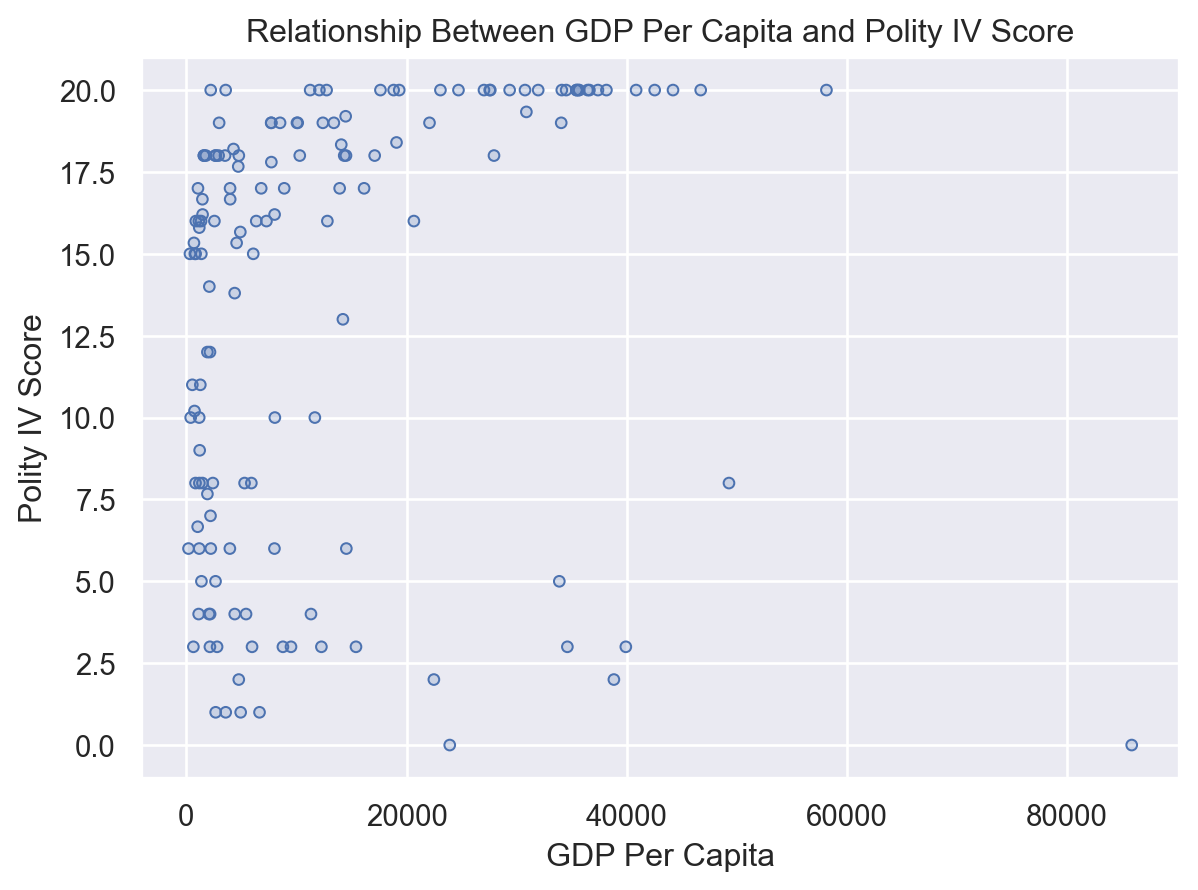

In [641]:
import seaborn.objects as so

# Create a plot that illustrate the relationship between GDP per capita and polity IV scores.
(
    so.Plot(
        wdi,
        x="gdppcap08",
        y="polityIV",
    )
    .add(so.Dots())
    .label(
        x="GDP Per Capita",
        y="Polity IV Score",
        title="Relationship Between GDP Per Capita and Polity IV Score",
    )
)

### Exercise 4

Now add a linear regression (*not* a higher order polynomial, just linear) fit to the scatter plot.

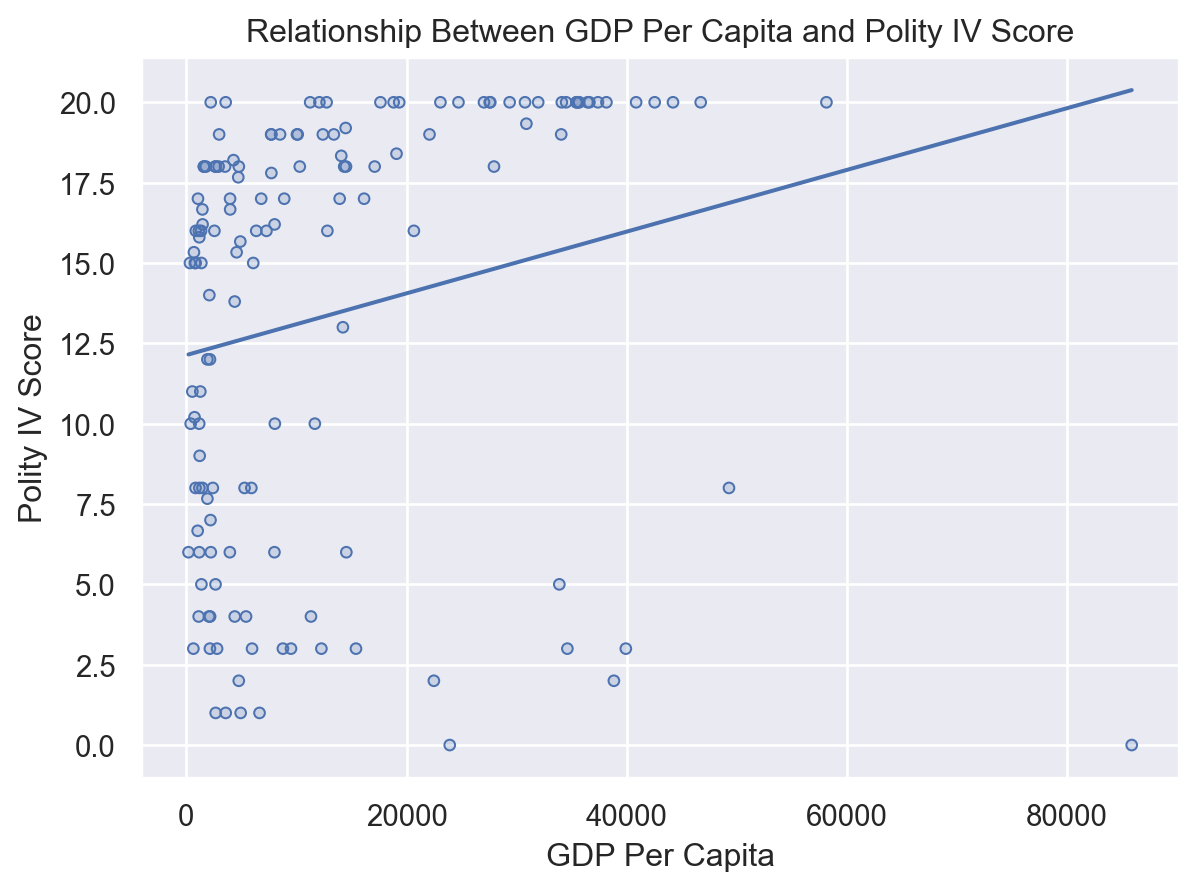

In [642]:
# Create a plot that illustrate the relationship between GDP per capita and polity IV scores with linear regression line.
(
    so.Plot(
        wdi,
        x="gdppcap08",
        y="polityIV",
    )
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(order=1))
    .label(
        x="GDP Per Capita",
        y="Polity IV Score",
        title="Relationship Between GDP Per Capita and Polity IV Score",
    )
)

### Exercise 5

Does it seem like the linear model you estimated fits the data well?

> The linear model I've estimated doesn't adequately capture the nuances of the data. One of the benefits of visual data representation is its immediate clarity. From our plot, it's evident that the relationship between variables is not linear. Thus, using tools aimed at analyzing linear relationships, such as correlation or linear regression, would yield misleading results. Linear models inherently strive to fit a straight line to the data, regardless of its actual distribution. To better understand and interpret our data, a transformation to achieve linearity might be necessary.

### Exercise 6

Linear models impose a very strict functional form on the model they use: they try to draw a straight line through the data, no matter what. 

Can you think of a transform for your data that would make the data a little more sane?

Apply the transformation.

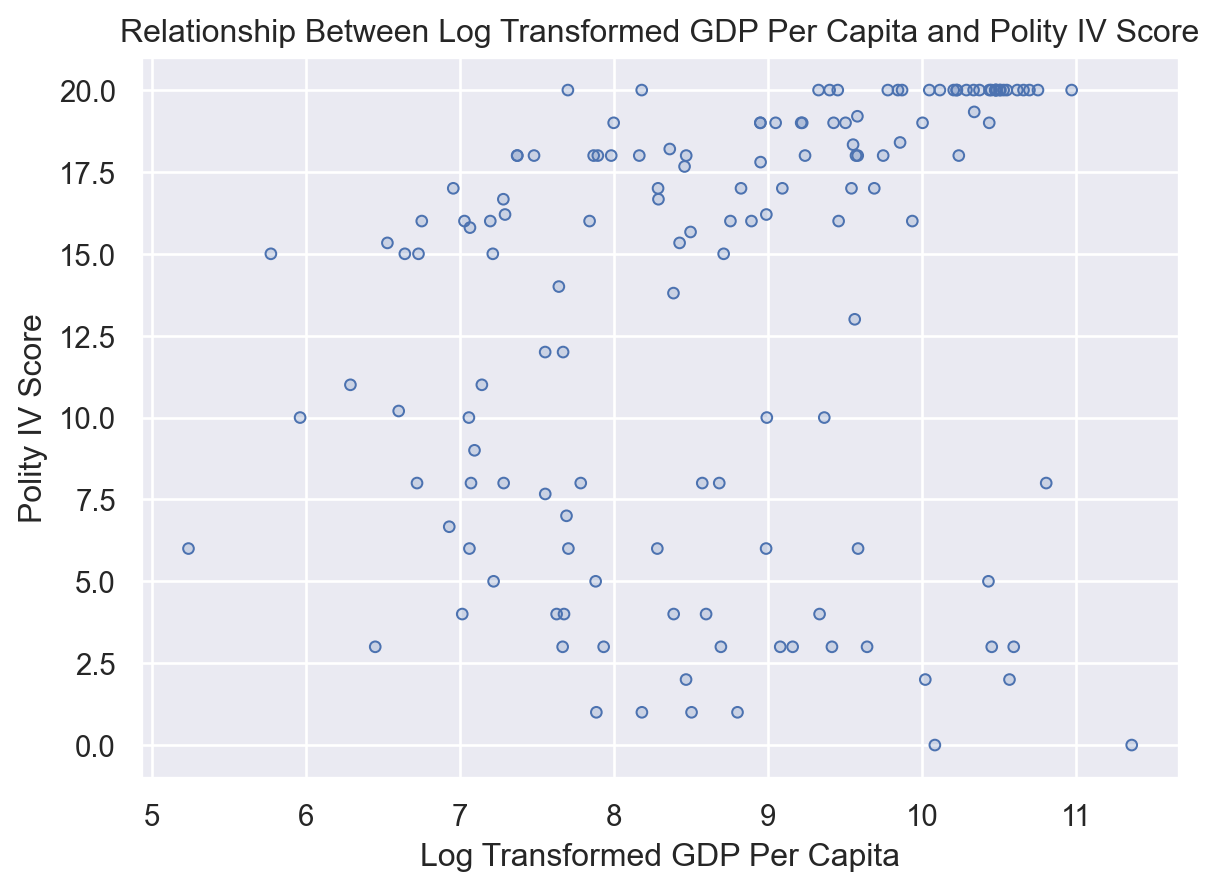

In [643]:
# apply log transformation to the GDP per capita variable
wdi["gdppcap08_log"] = np.log(wdi["gdppcap08"])

# Create a plot that illustrate the relationship between log transformed GDP per capita and polity IV scores.
(
    so.Plot(
        wdi,
        x="gdppcap08_log",
        y="polityIV",
    )
    .add(so.Dots())
    .label(
        x="Log Transformed GDP Per Capita",
        y="Polity IV Score",
        title="Relationship Between Log Transformed GDP Per Capita and Polity IV Score",
    )
)

> + I applied log transformation to the GDP per capita variable. I then plotedd the relationship between log transformed GDP per capita and polity IV scores.
> + It seems like the the transformed data became more sane.

### Exercise 7

Once you've applied that transformation, let's re-fit our model. 

Rather than imposing linearity this time, however, let's fit a model with a flexible functional form. Using the recipe for a [lowess regression you can find here](https://nickeubank.github.io/practicaldatascience_book/notebooks/class_5/week_2/20_plotting_with_seaborn.html#a-little-bonus), see how well a lowess regression fits your updated data. This is a form of local polynomial regression that is designed to be flexible in how it fits the data. 

In [644]:
from dataclasses import dataclass
from seaborn._stats.base import Stat
import statsmodels.api as sm


@dataclass
class Lowess(Stat):
    """
    Fit a locally-weighted regression to smooth the data.
    """

    frac: float = 0.2  # Fraction of data to use when estimating each y-value
    gridsize: int = 100  # How fine-grained to plot the curve. Increase if jagged.

    def _fit_predict(self, data):
        x = data["x"]
        xx = np.linspace(x.min(), x.max(), self.gridsize)
        # https://www.statsmodels.org/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html
        yy = sm.nonparametric.lowess(exog=x, endog=data["y"], xvals=xx, frac=self.frac)
        return pd.DataFrame(dict(x=xx, y=yy))

    def __call__(self, data, groupby, orient, scales):
        return groupby.apply(data.dropna(subset=["x", "y"]), self._fit_predict)

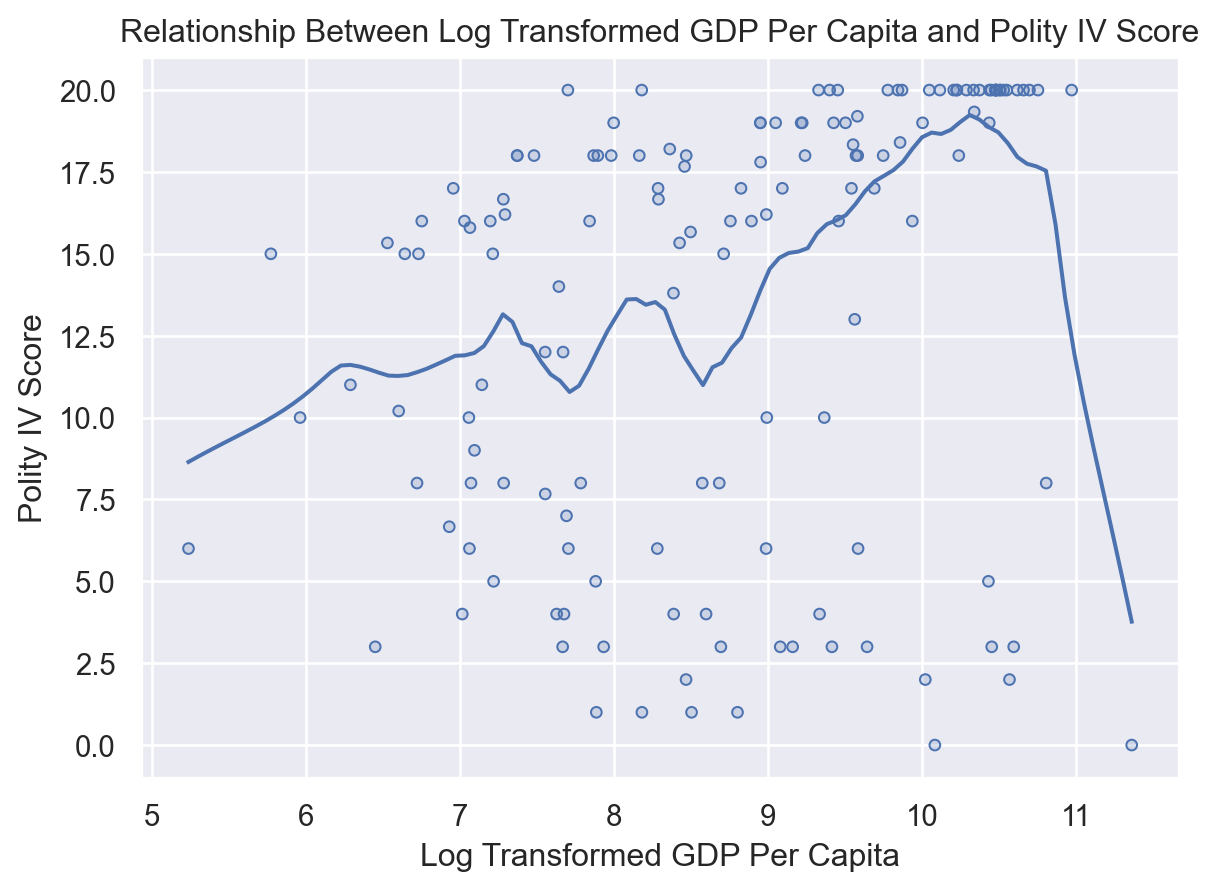

In [645]:
# Use lowess regression to fit my updated data
(
    so.Plot(
        wdi,
        x="gdppcap08_log",
        y="polityIV",
    )
    .add(so.Dots())
    .add(so.Lines(), Lowess())
    .label(
        x="Log Transformed GDP Per Capita",
        y="Polity IV Score",
        title="Relationship Between Log Transformed GDP Per Capita and Polity IV Score",
    )
)

> As the Log Transformed GDP Per Capita increases, there's an initial rise in the Polity IV Score until the GDP reaches a mark of 10 in its log-transformed state, with few minor fluctuations in between. However, once the Log Transformed GDP Per Capita surpasses 10, we notice a pronounced decline in the Polity IV Score. This sharp decrease is likely influenced by several outlier countries situated in the bottom-right quadrant of the plot. These nations exhibit high values for Log Transformed GDP Per Capita but low scores on the Polity IV scale, indicating considerable wealth but low democracy.

### Exercise 8

This does seem to fit the data better, but there seem to be quite a few outliers in the bottom right. Who is that? Add text labels to the points on your graph with country names. Make sure the size of your text labels leaves them legible.

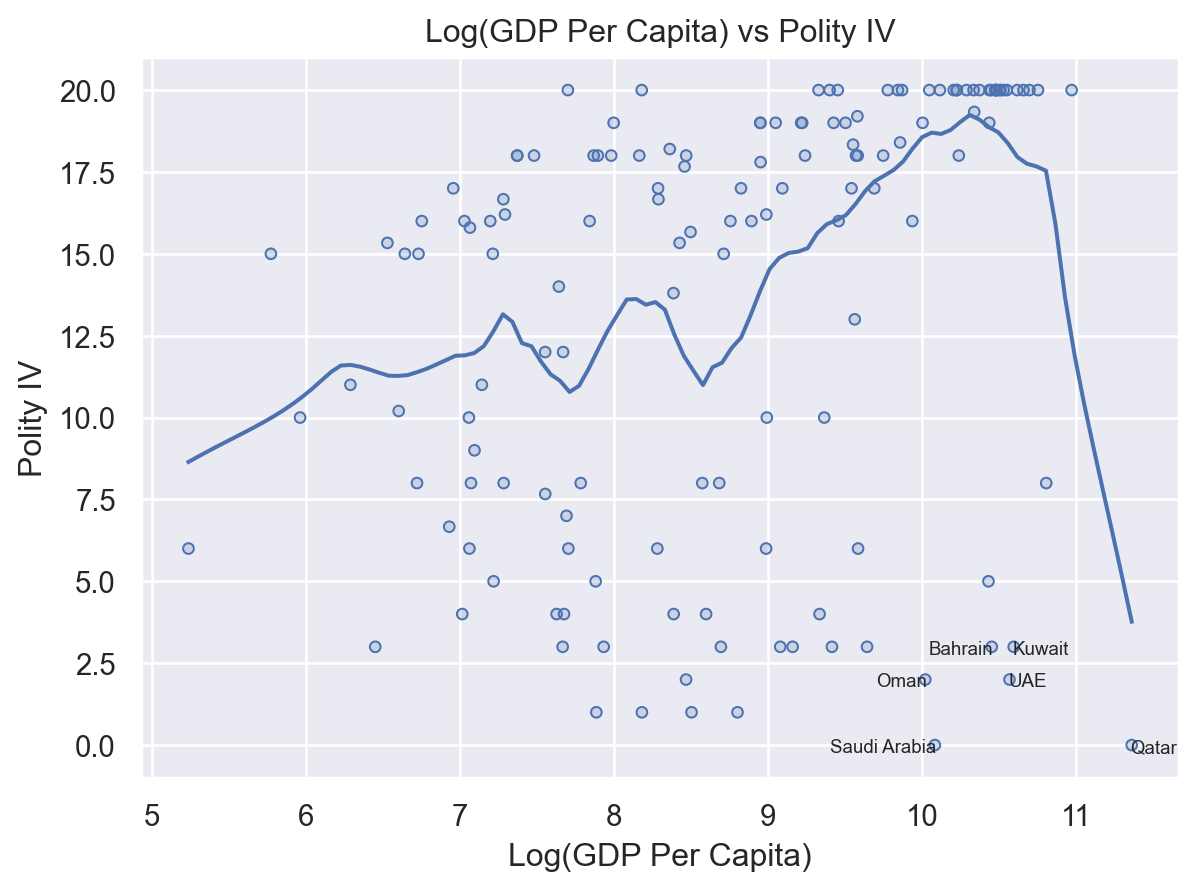

In [646]:
# Add text labels to the outlier points on my graph with country names.
def is_outlier_1(row):
    return (
        row["country"]
        if (10 < row["gdppcap08_log"] < 10.5) and (row["polityIV"] < 4)
        else np.nan
    )


def is_outlier_2(row):
    return (
        row["country"]
        if (row["gdppcap08_log"] > 9)
        and (row["polityIV"] < 4)
        and (row["gdppcap08_log"] > 10.5)
        else np.nan
    )


# Apply the functions to create the columns
wdi["outliers_1"] = wdi.apply(is_outlier_1, axis=1)
wdi["outliers_2"] = wdi.apply(is_outlier_2, axis=1)


(
    so.Plot(wdi, x="gdppcap08_log", y="polityIV")
    .add(so.Dots())
    .add(so.Lines(), Lowess())
    .add(
        so.Text(fontsize=7, offset=-0.5, halign="right"),
        text="outliers_1",
    )
    .add(
        so.Text(fontsize=7, offset=-0.5, halign="left"),
        text="outliers_2",
    )
    .label(
        x="Log(GDP Per Capita)",
        y="Polity IV",
        title="Log(GDP Per Capita) vs Polity IV",
    )
)

In [647]:
# Combine the 'outliers_1' and 'outliers_2' columns and drop any NaN values
combined_outliers = pd.concat([wdi["outliers_1"], wdi["outliers_2"]]).dropna().tolist()

print("Outlier Countries are:")
print(combined_outliers)

Outlier Countries are:
['Bahrain', 'Oman', 'Saudi Arabia', 'Kuwait', 'Qatar', 'UAE']


> + From the graph, we observe that the outlier countires are at the bottom right corner. 
> + The outlier countries have a high log transformed GDP per capita, and a low polity IV score. In another word, the outlier countries have good wealth, but low democracy. 
> + The outlier countries are Qatar, Saudi Arabia, Bahrain, Kuwait, Oman, UAE.

### Exercise 9

Interesting. It seems that there's are a lot of rich, undemocratic countries that all have something in common: they're oil-rich, small, Middle Eastern countries.

Let's see what happens if we exclude the ten countries with the highest per-capita oil production from our data: Qatar, Kuwait, Equatorial Guinea, United Arab Emirates, Norway, Saudi Arabia, Libya, Oman, Gabon, and Angola. (Note this was in 2007, and excludes very small countries!) 

What does the relationship between Polity and GDP per capita look like for non-natural resource producers?

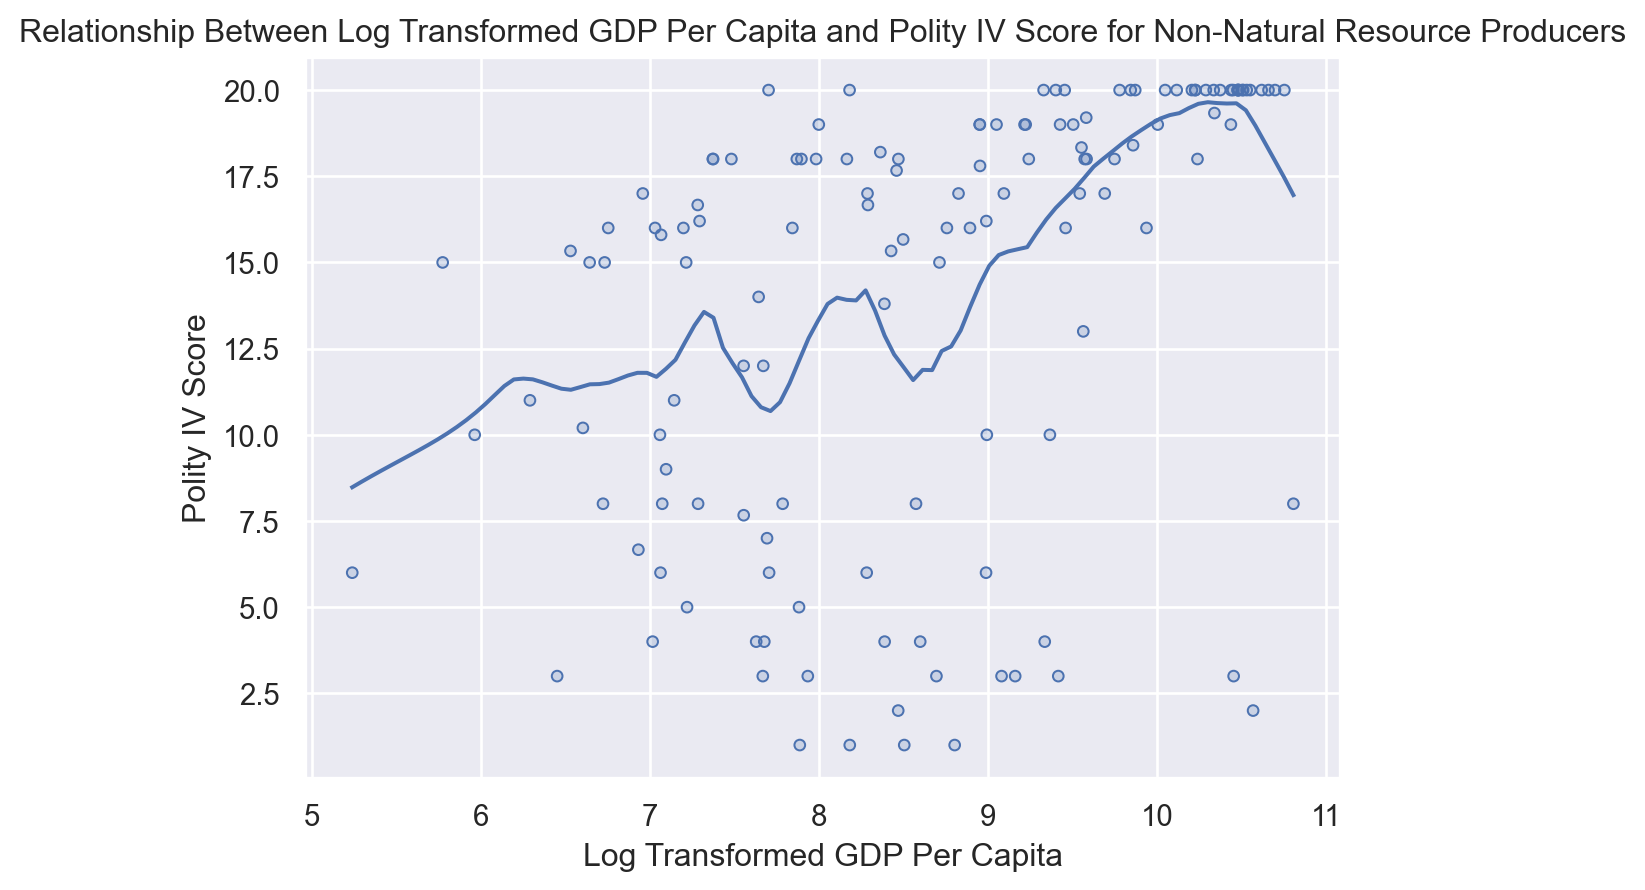

In [648]:
# List of top oil-producing countries in 2007
oil_rich_countries = [
    "Qatar",
    "Kuwait",
    "Equatorial Guinea",
    "United Arab Emirates",
    "Norway",
    "Saudi Arabia",
    "Libya",
    "Oman",
    "Gabon",
    "Angola",
]

# Filter out oil-rich countries
filtered_wdi = wdi[~wdi["country"].isin(oil_rich_countries)]

# Plot the relationship for non-oil-rich countries
(
    so.Plot(
        filtered_wdi,
        x="gdppcap08_log",
        y="polityIV",
    )
    .add(so.Dots())
    .add(so.Lines(), Lowess())
    .label(
        x="Log Transformed GDP Per Capita",
        y="Polity IV Score",
        title="Relationship Between Log Transformed GDP Per Capita and Polity IV Score for Non-Natural Resource Producers",
    )
)

> Generally, as Log Transformed GDP per capita rises, indicating increased wealth, the Polity IV score, denoting level of democracy, also tends to increase for non-natural resource producer countries. However, there are minor fluctuations observed in between.

### Exercise 10

Let's make sure that you accurately identified all 10 of the oil producers. Write a line of code to count up how many big producers you have identified. If you do not get 10, can you figure out what you did wrong?

In [649]:
# To verify the accurate identification of all 10 oil producers from the list
# I count the number of countries from the oil_rich_countries list that exist in the wdi dataframe.

matched_oil_producers = wdi[wdi["country"].isin(oil_rich_countries)]["country"].count()
print(f"I have identified {matched_oil_producers} big producers of oil.")

I have identified 9 big producers of oil.


In [650]:
missing_countries = list(
    set(oil_rich_countries)
    - set(wdi[wdi["country"].isin(oil_rich_countries)]["country"].tolist())
)
print(f"The big producer of oil that I failed to identify is {missing_countries[0]}.")

The big producer of oil that I failed to identify is United Arab Emirates.


In [651]:
# Check if United Arab Emirates is in the wdi[country] column.
if "United Arab Emirates" in wdi["country"].values:
    print("United Arab Emirates is in the country column of the wdi dataframe.")
else:
    print("United Arab Emirates is not in the country column of the wdi dataframe.")

United Arab Emirates is not in the country column of the wdi dataframe.


In [652]:
# check country names in the outliers list
print(combined_outliers)

['Bahrain', 'Oman', 'Saudi Arabia', 'Kuwait', 'Qatar', 'UAE']


> + I did not get 10 countries because one of the highest per-capita oil production country, United Arab Emirates, is in the wdi dataset named as "UAE". 
> + I need to change the name in the oil_rich_countries list from United Arab Emirates to UAE.

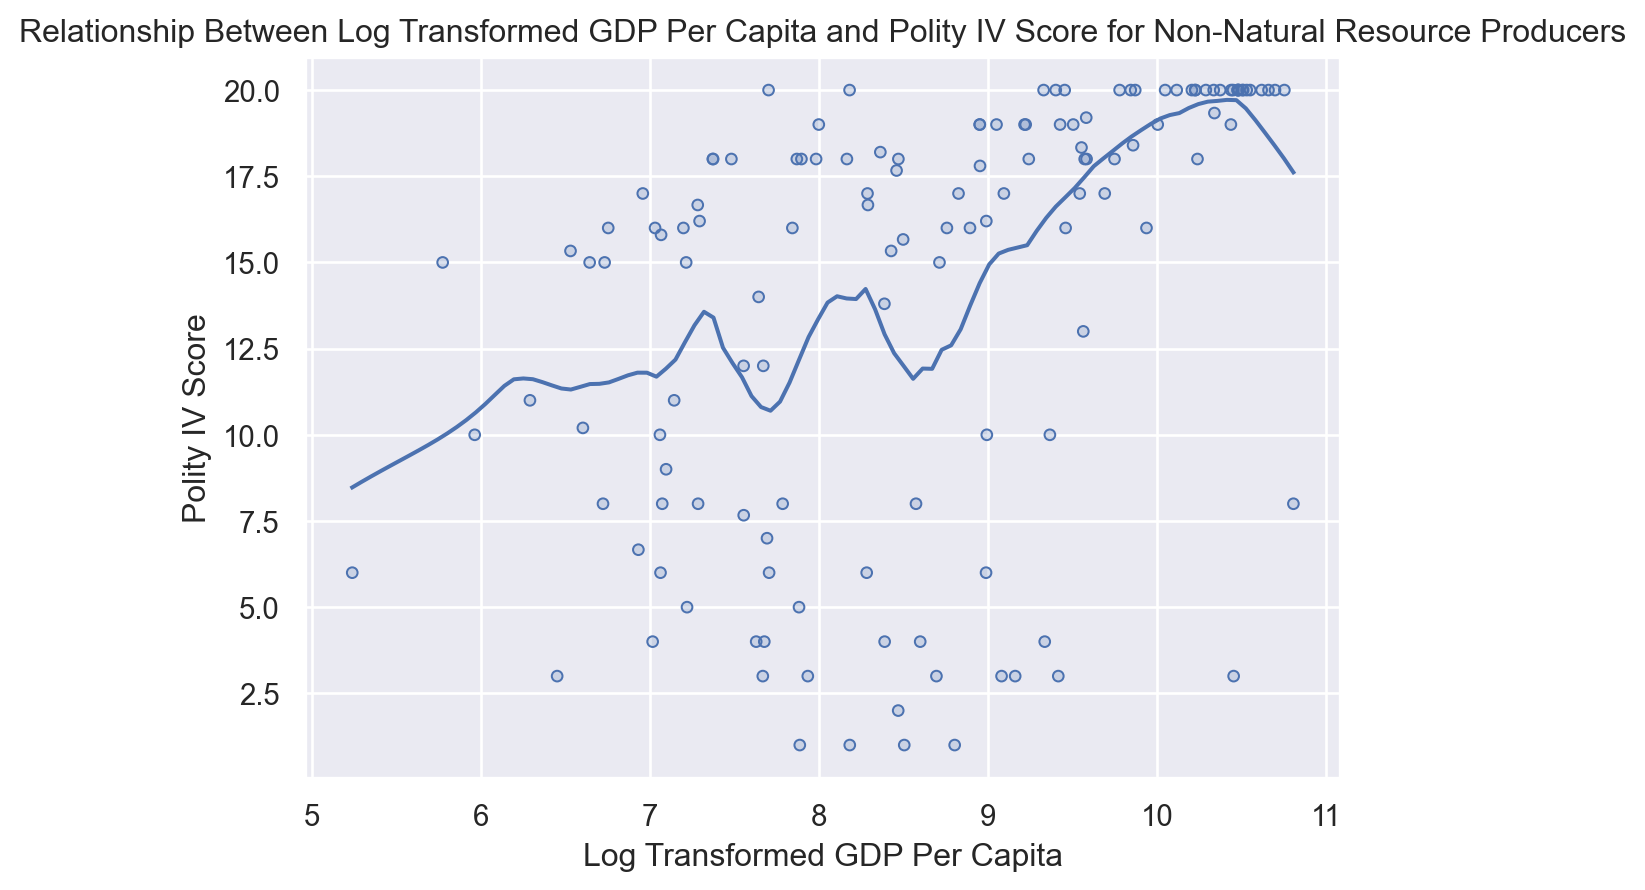

In [653]:
# List of top oil-producing countries in 2007
oil_rich_countries = [
    "Qatar",
    "Kuwait",
    "Equatorial Guinea",
    "UAE",
    "Norway",
    "Saudi Arabia",
    "Libya",
    "Oman",
    "Gabon",
    "Angola",
]

# Filter out oil-rich countries
filtered_wdi = wdi[~wdi["country"].isin(oil_rich_countries)]

# Plot the relationship for non-oil-rich countries
(
    so.Plot(
        filtered_wdi,
        x="gdppcap08_log",
        y="polityIV",
    )
    .add(so.Dots())
    .add(so.Lines(), Lowess())
    .label(
        x="Log Transformed GDP Per Capita",
        y="Polity IV Score",
        title="Relationship Between Log Transformed GDP Per Capita and Polity IV Score for Non-Natural Resource Producers",
    )
)

> Generally, as a non-natural resource producer country's Log Transformed GDP per capita rises, indicating increased wealth, its Polity IV score, denoting its level of democracy, also tends to increase. However, there are minor fluctuations observed in between.

In [654]:
matched_oil_producers = wdi[wdi["country"].isin(oil_rich_countries)]["country"].count()
print(f"I have identified {matched_oil_producers} big producers of oil.")

I have identified 10 big producers of oil.


### Exercise 11

How does the relationship between GDP per capita and Polity look for the oil producers we dropped above?

(note a Lowess line may not plot if you don't have enough data)

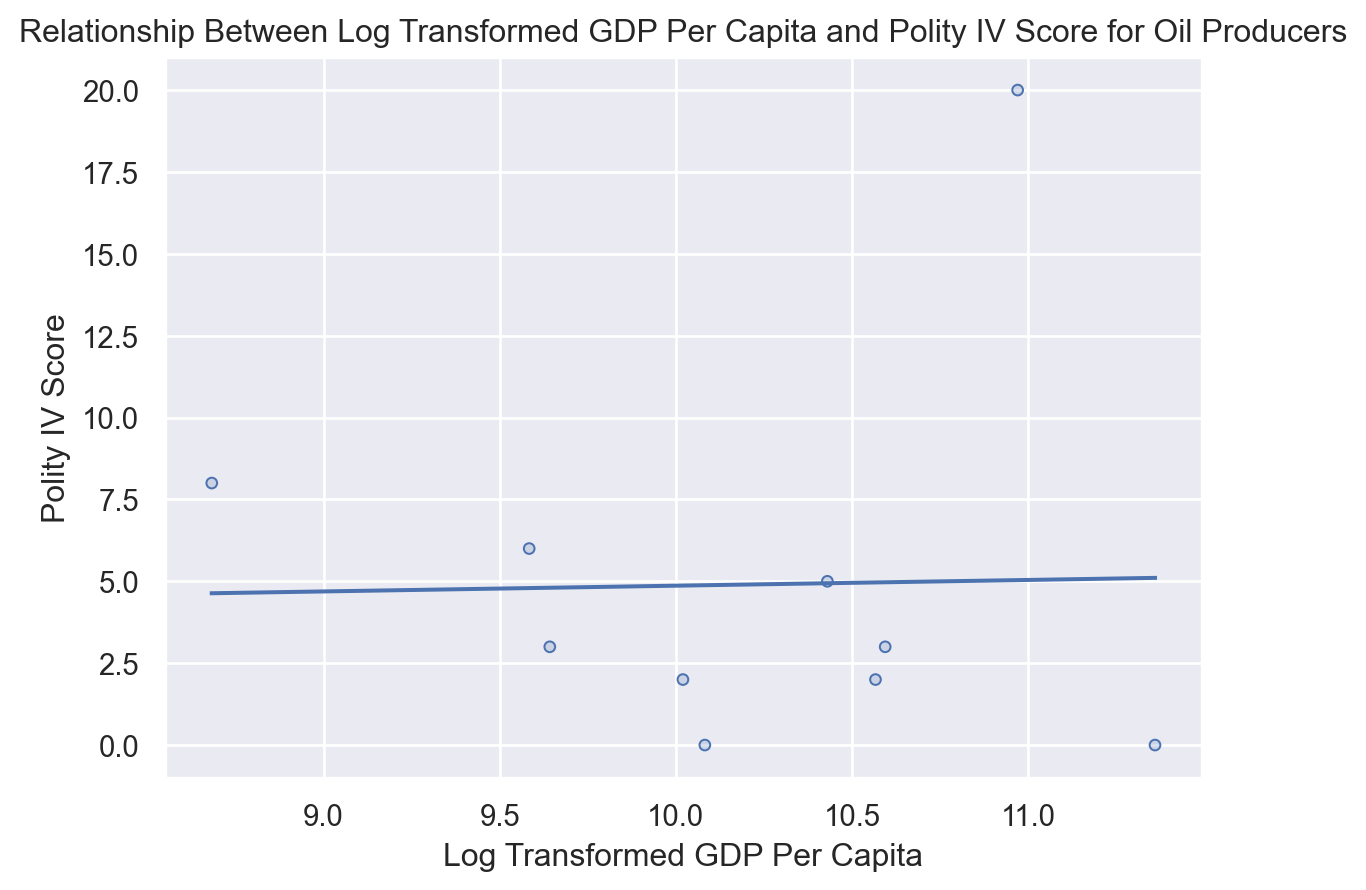

In [655]:
# oil-rich countries
oil_wdi = wdi[wdi["country"].isin(oil_rich_countries)]

# Plot the linear relationship for oil-rich countries
(
    so.Plot(
        oil_wdi,
        x="gdppcap08_log",
        y="polityIV",
    )
    .add(so.Dots())
    .add(so.Lines(), so.PolyFit(order=1))
    .label(
        x="Log Transformed GDP Per Capita",
        y="Polity IV Score",
        title="Relationship Between Log Transformed GDP Per Capita and Polity IV Score for Oil Producers",
    )
)

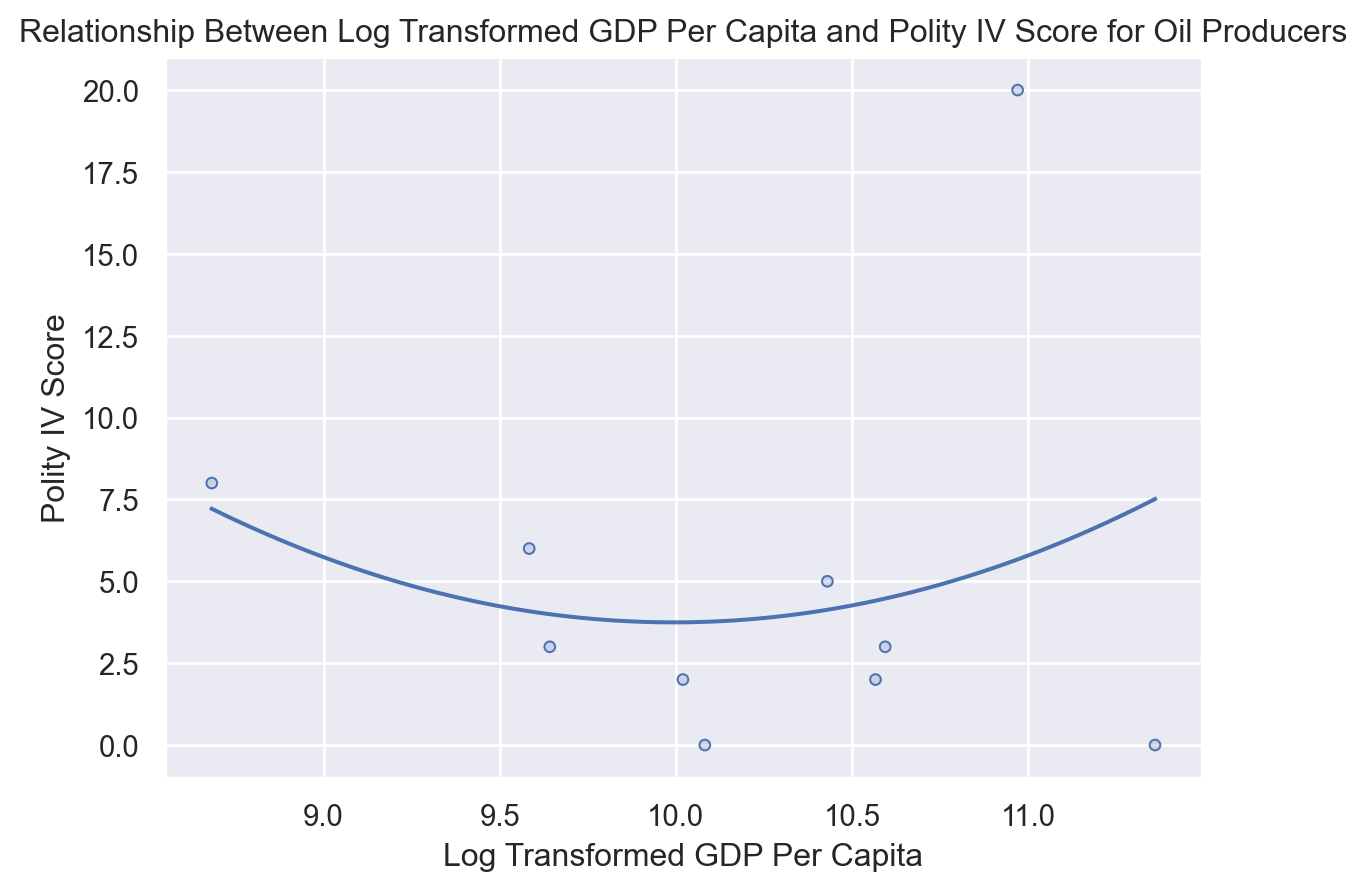

In [656]:
# Plot the relationship for non-oil-rich countries
(
    so.Plot(
        oil_wdi,
        x="gdppcap08_log",
        y="polityIV",
    )
    .add(so.Dots())
    .add(so.Lines(), so.PolyFit())
    .label(
        x="Log Transformed GDP Per Capita",
        y="Polity IV Score",
        title="Relationship Between Log Transformed GDP Per Capita and Polity IV Score for Oil Producers",
    )
)

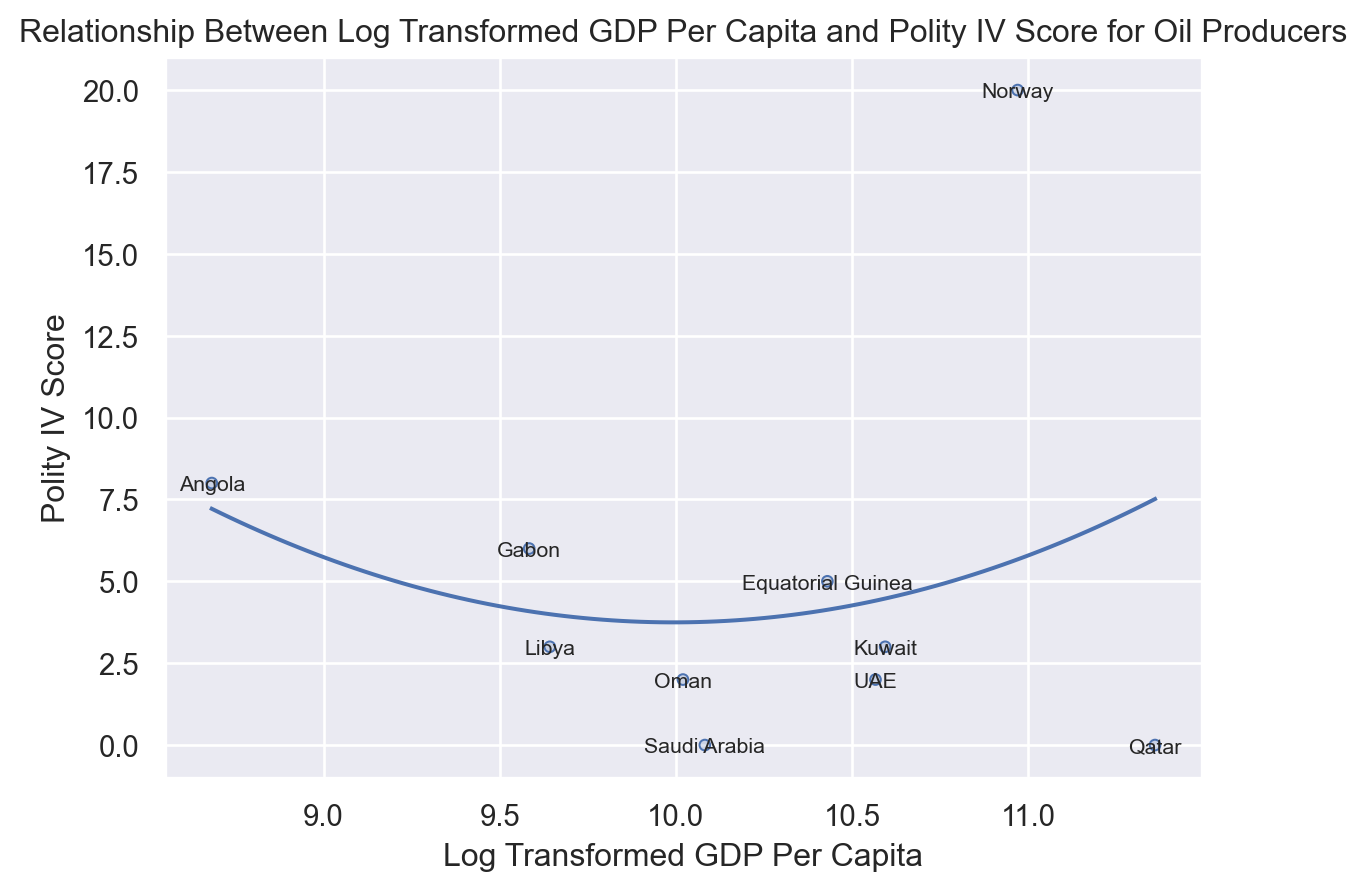

In [657]:
(
    so.Plot(
        oil_wdi,
        x="gdppcap08_log",
        y="polityIV",
    )
    .add(so.Dots())
    .add(so.Lines(), so.PolyFit())
    .add(so.Text(fontsize=8), text="country")
    .label(
        x="Log Transformed GDP Per Capita",
        y="Polity IV Score",
        title="Relationship Between Log Transformed GDP Per Capita and Polity IV Score for Oil Producers",
    )
)

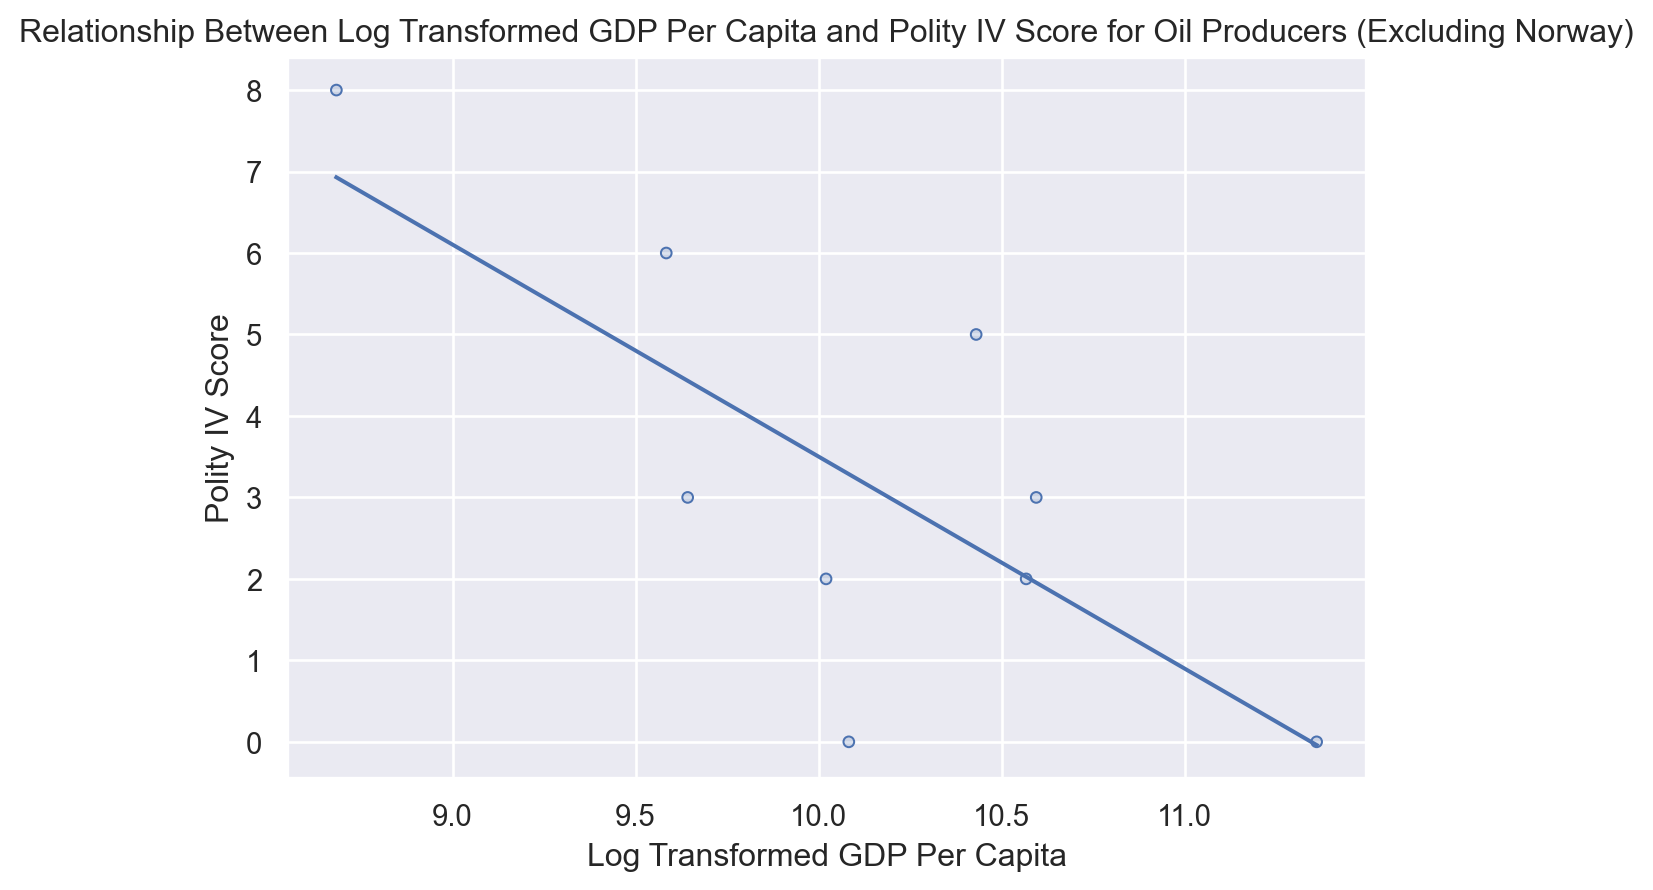

In [658]:
# List of top oil-producing countries in 2007 dropping Norway
oil_rich_countries_no_norway = [
    "Qatar",
    "Kuwait",
    "Equatorial Guinea",
    "UAE",
    "Saudi Arabia",
    "Libya",
    "Oman",
    "Gabon",
    "Angola",
]

# oil-rich countries dropping Norway
no_norway_oil_wdi = wdi[wdi["country"].isin(oil_rich_countries_no_norway)]

# Plot the linear relationship for oil-rich countries dropping Norway
(
    so.Plot(
        no_norway_oil_wdi,
        x="gdppcap08_log",
        y="polityIV",
    )
    .add(so.Dots())
    .add(so.Lines(), so.PolyFit(order=1))
    .label(
        x="Log Transformed GDP Per Capita",
        y="Polity IV Score",
        title="Relationship Between Log Transformed GDP Per Capita and Polity IV Score for Oil Producers (Excluding Norway)",
    )
)

> + There appears to be a slightly positive correlation (almost negligible) between GDP per capita and the Polity IV score for oil-producing countries.
> + However, this slightly positive correlation might be influenced by the outlier, Norway, which exhibits both a high Polity IV score and a high log-transformed GDP per capita. In contrast, most other oil-producing countries have a low Polity IV score despite a high log-transformed GDP per capita.
> + When we exclude the outlier, Norway, a pronounced negative linear relationship emerges between GDP per capita and the Polity IV score among oil-producing countries, indicating negative correlation between GDP per capita and the Polity IV score among oil-producing countries.

### Exercise 12

Look back to your answer for Exercise 2. Do you still believe the result of your linear model? What did you learn from plotting. Write down your answers with your partner. 

> Observations
  > + My linear model raises skepticism, primarily because it appears to oversimplify the dataset's intricacies. 
  > + The linear model reveals a superficial positive linear relationship between GDP per capita and the Polity IV score across all countries. However, this observation is deceptive. 
  > + When I plot the data, I observe that the data is not linear, and oil producing countries seem to defy the overall trend.

> Analysis
  > + A closer analysis using a log transformation of GDP per capita combined with a lowess regression uncovers a more complex pattern. Initially, the Polity IV score rises with an increase in the log-transformed GDP per capita, but it soon takes a downward turn. This decline is influenced by several outlier countries, predominantly in the bottom-right quadrant of the plot. Notably, these outliers are oil-producing nations, characterized by their significant wealth yet limited democracy. Excluding them reveals a clearer positive correlation between log-transformed GDP per capita and Polity IV scores for non-oil producing countries. 
  > + For the oil-producing countries, at first glance, a slightly positive correlation (almost negligible) exists between GDP per capita and the Polity IV score. This correlation, however, is skewed by Norway—an outlier with both a high democratic score and significant wealth. Removing Norway from the equation exposes a negative correlation between GDP per capita and the Polity IV score among other oil producers.
  
> Conclusion
  > + Hence, assessing the relationship between GDP per capita and the Polity IV score mandates a more nuanced approach. Plotting helps me to account for different contexts and outliers before resorting to linear regression analysis. A blanket linear model can often be misleading by not encapsulating the dataset's full story.
  > + In this case, my plotting suggests that separating oil-producing from non-oil-producing countries during linear regression will offer more accurate and insightful conclusions.

### Exercise 13

Finally, let's make a plot that color codes countries by whether they are big oil producers. Include separate linear regression fits for both groups.

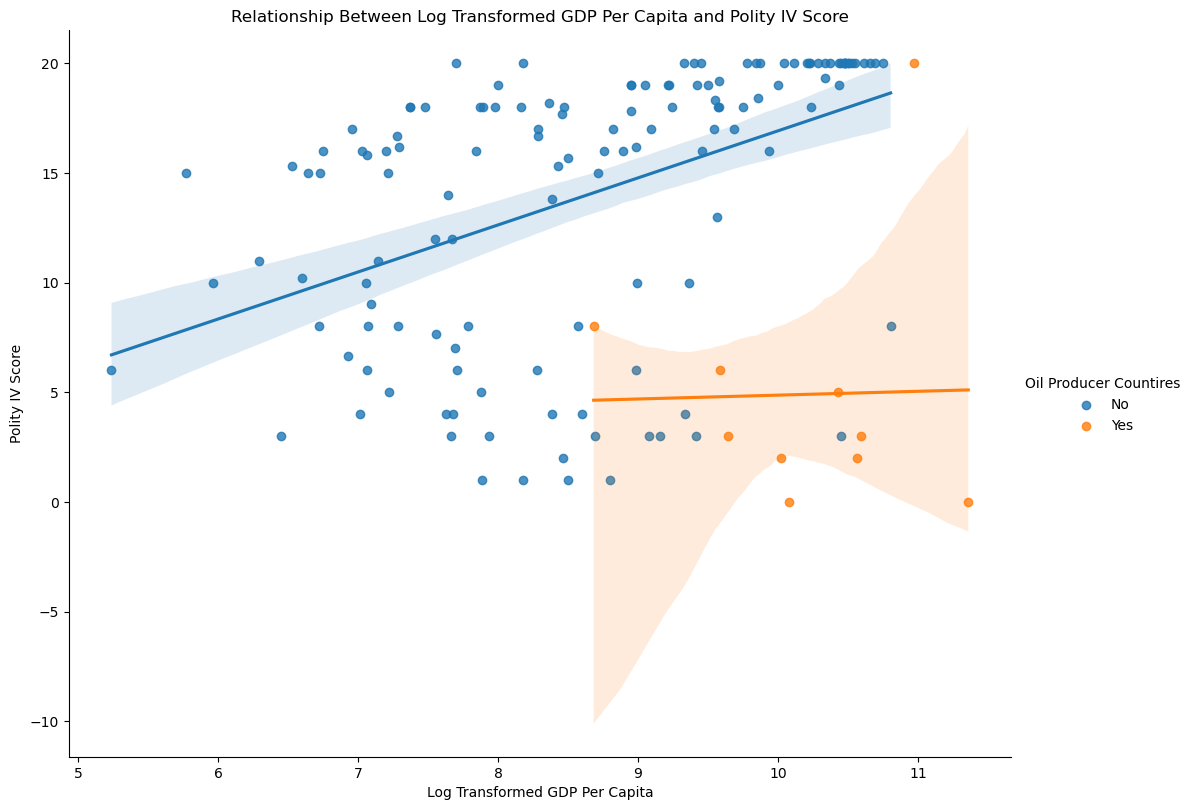

In [659]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Oil Producer Countries
wdi["Oil Producer Countires"] = [
    "Yes"
    if country
    in [
        "Qatar",
        "Kuwait",
        "Equatorial Guinea",
        "UAE",
        "Norway",
        "Saudi Arabia",
        "Libya",
        "Oman",
        "Gabon",
        "Angola",
    ]
    else "No"
    for country in wdi["country"]
]

# Use lmplot to create a scatter plot with regression lines
sns.lmplot(
    data=wdi,
    x="gdppcap08_log",
    y="polityIV",
    hue="Oil Producer Countires",
    height=8,
    aspect=1.3,
)

# Add labels and title
plt.xlabel("Log Transformed GDP Per Capita")
plt.ylabel("Polity IV Score")
plt.title("Relationship Between Log Transformed GDP Per Capita and Polity IV Score")

# Show the plot
plt.show()

> + The plot reveals a positive correlation between Log Transformed GDP per Capita and Polity IV Score for non-oil-producing countries.
> + The plot reveals a slightly positive correlation (almost negligible) between Log Transformed GDP per Capita and Polity IV Score for oil-producing countries. However, it's worth noting that Norway, being an outlier, skews this correlation significantly.

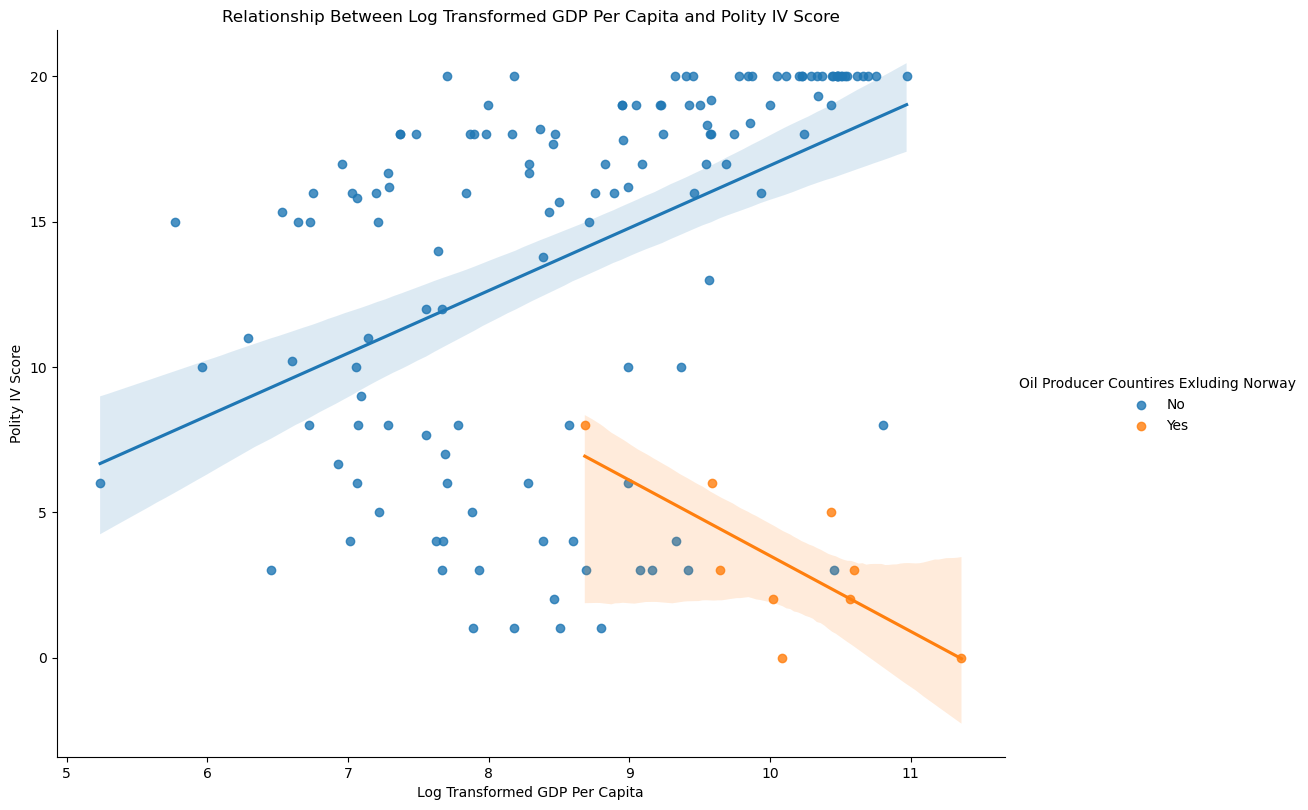

In [660]:
# Oil Producer Countries Excluding Norway
wdi["Oil Producer Countires Exluding Norway"] = [
    "Yes"
    if country
    in [
        "Qatar",
        "Kuwait",
        "Equatorial Guinea",
        "UAE",
        "Saudi Arabia",
        "Libya",
        "Oman",
        "Gabon",
        "Angola",
    ]
    else "No"
    for country in wdi["country"]
]

# Use lmplot to create a scatter plot with regression lines
sns.lmplot(
    data=wdi,
    x="gdppcap08_log",
    y="polityIV",
    hue="Oil Producer Countires Exluding Norway",
    height=8,
    aspect=1.3,
)

# Add labels and title
plt.xlabel("Log Transformed GDP Per Capita")
plt.ylabel("Polity IV Score")
plt.title("Relationship Between Log Transformed GDP Per Capita and Polity IV Score")

# Show the plot
plt.show()

> + The plot reveals a positive correlation between Log Transformed GDP per Capita and Polity IV Score for non-oil-producing countries.
> + The plot reveals a negative correlation between Log Transformed GDP per Capita and Polity IV Score for oil-producing countries, excluding the outlier Norway.

## Take-aways

One of our main jobs as data scientists is to *summarize* data. In fact, its such an obvious part of our jobs we often don't think about it very much. In reality, however, this is one of the most difficult things we do. 

Summarization means taking rich, complex data and trying to tell readers about what is going on in that data using simple statistics. In the process of summarization, therefore, we must necessarily throw away much of the richness of the original data. When done well, this simplification makes data easier to understand, but only if we throw away the *right* data. You can *always* calulate the average value of a variable, or fit a linear model, but whether doing so generates a summary statistic that properly represents the essence of the data being studied depends on the data itself. 

Plotting is one fo the best tools we have as data scientists for evaluating whether we are throwing away the *right* data. As we learned from Part 1 of this exercise, just looking at means and standard deviations can mask tremendous variation. Each of our example datasets looked the same when we examined our summary statistics, but they were all radically different when plotted. 

Similarly, a simple linear model would "tell" us that if GDP per capita increases by \$10,000, we would expect Polity scores to increase by about 1 (i.e. the coefficent on the linear model was 9.602e-05). But when we plot the data, not only can we that the data is definitely *not* linear (and so that slope doesn't really mean anything), but we can also see that oil producing countries seem to defy the overall trend, and so should maybe be studied separately. 

Moreover, we can see that if we just look at oil producers, there is no clear story: some are rich and democratic, while others are rich and autocratic (indeed, [this observation is the foundation of some great research on the political consequences of resource wealth](https://www.jstor.org/stable/41480824)!)

So remember this: tools for summarizing data will always give you an answer, but it's up to you as a data scientist to make sure that the summaries you pass on to other people properly represent the data you're using. And there is perhaps no better way to do this than with plotting!



## Overlaying Data Series with matplotlib

In our last plotting exercises, you were asked to make a paired plot in which different data series were plotted next to one another with a shared x-axis. Presumably that resulted in a figure that looked something like this:

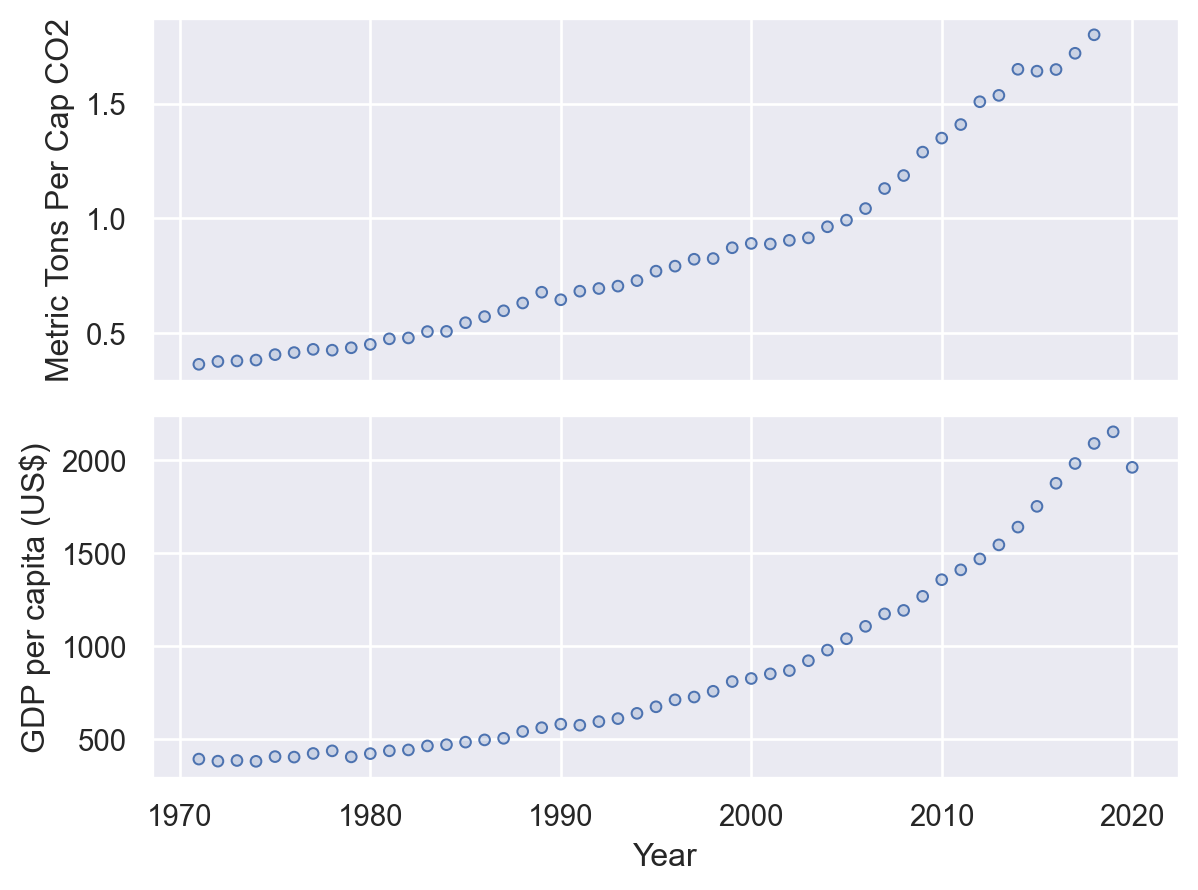

In [ ]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

import seaborn.objects as so
from matplotlib import style
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

wdi = pd.read_csv(
    "https://raw.githubusercontent.com/nickeubank/"
    "practicaldatascience/master/Example_Data/wdi_plotting.csv"
)

india = wdi[wdi["Country Name"] == "India"]

india = india.rename(
    columns={
        "CO2 emissions (metric tons per capita)": "Metric Tons Per Cap CO2",
        "GDP per capita (constant 2010 US$)": "GDP per capita (US$)",
    }
)
p = (
    so.Plot(
        india,
        x="Year",
    )
    .add(so.Dots())
    .pair(
        y=[
            "Metric Tons Per Cap CO2",
            "GDP per capita (US$)",
        ]
    )
)
p

Often times, however, it's more interesting to directly overlay data series on the same plot to make a figure like this:

![two series sample plot](images/two_series_overlay.png)

So let's do that here!

### Exercise 14

Making this work will require two new tricks: 

- using the `.twinx()` method from matplotlib, and 
- suing the `.on()` method from seaborn.objects.

How? Great question! I'm going to leave it to you to figure that out using the documentation for these methods. But here's a start — you can find the `.on()` [method for seaborn.objects here](https://seaborn.pydata.org/generated/seaborn.objects.Plot.on.html), and the `.twinx()` for matplotlib [method demonstrated here](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py)

Oh, and you may note use these two variables as your two. :) 

Good luck! 

Also, if you want to, feel free to add any extra bells and whistles as part of your exploration (like a legend, or colored y-axis labels).

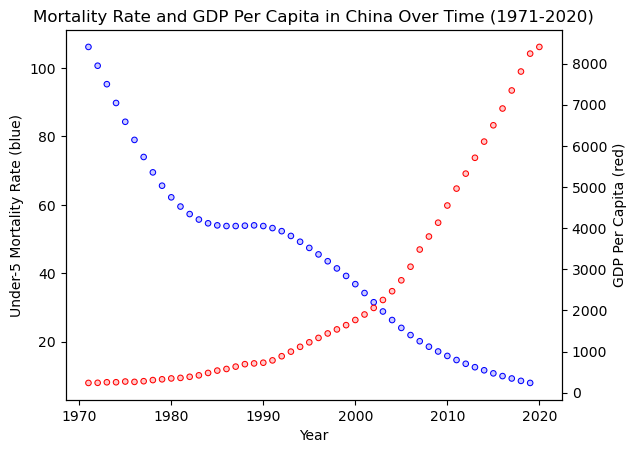

In [ ]:
china = wdi[wdi["Country Name"] == "China"]

fig, ax1 = plt.subplots()
p = (
    so.Plot(china, x="Year", y="Mortality rate, under-5 (per 1,000 live births)")
    .add(so.Dots(color="blue"))
    .label(x="Year", y="Under-5 Mortality Rate (blue)")
)
p.on(ax1).plot()
ax2 = ax1.twinx()
p2 = (
    so.Plot(china, x="Year", y="GDP per capita (constant 2010 US$)")
    .add(so.Dots(color="red"))
    .label(
        x="Year",
        y="GDP Per Capita (red)",
        title="Mortality Rate and GDP Per Capita in China Over Time (1971-2020)",
    )
)
p2.on(ax2).plot()
# Show the plot
plt.show()

> + The graph illustrates trends in two variables: GDP per capita (constant 2010 US dollars) and the under-5 mortality rate (per 1,000 live births) for China from 1971 to 2020. This provides a clear visualization of their progression over time.
> + The graph indicates that as China's GDP per capita increased from 1971 to 2020, the under-5 mortality rate decreased.